## Artificial and Computational Intelligence - Local Search

### Problem statement - Packet delivery agent

Assume that you are in charge of an online e-commerce site which collects goods from vendors, stores them in godowns and later deliver them based on order placed. You have been assigned with robots that pick up packets from the front office and stores them in appropriate rooms. The packets are of different weights. The robot can carry 10 Kgs at a time. As in charge of the facility, you are required to give specific instructions to the robot to carry packets and store them in the rooms which are of different capacities. 

> The problem here is to find the correct combination of packets that can be carried by the robot so as to minimize the number of commutes by the robot to complete the job, the number of rooms used by the robot to store the contingency, and the remaining storage space.


##### The following figure gives the environment of the robot:

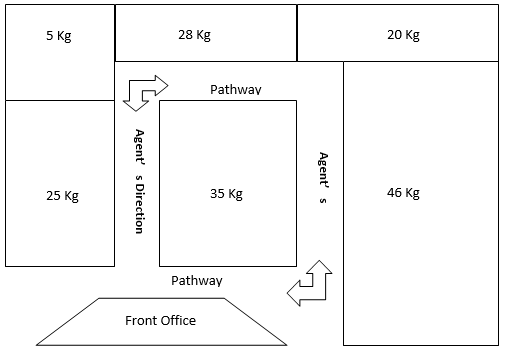



##### The below table gives the Packet weights and number of packets:

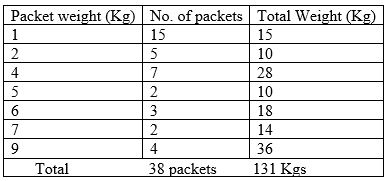


1.	Explain the heuristic that can be used to solve the problem? Justify your choice.
2.	Explain the cost function associated with your search in reaching the goal.
3.	Choose the correct algorithm suitable for this grid search.
4.	Print the number of commutes by the robot, the weight carried by the robot in each commute, the number of rooms used to store the contingency and the remaining space for the store keeper’s reference.


##### Problem to be solved using Local search

Things to follow:
1. Use appropriate data structures to represent the graph and the path using python libraries
2. Provide proper documentation
3. Find the path and cost associated with the path and print these


### Definition of PEAS
PEAS stand for Performance, Environment, Actuators, and Sensors. Based on these properties of an agent, they can be distinguished together or can be differentiated from each other. These properties provide the insight of an agent, as given below:

> ##### Performance: 
The output which we get from the agent. All the necessary results that an agent gives after processing comes under its performance. Our robot will process all the packets and rearrange them in the combination of 10 weights or less for each trip and how the robot will process all the packets and rearrange them in the combination of weights given for storage in go-down room.  Measures: Complete delivery of packages, minimize transversal of robot, minimize utilization of go-down rooms, maximize robot's backpack filling.

> ##### Environment: 
All the surrounding things and conditions of an agent fall in this section. It basically consists of all the things under which the agents work. Our robot will be configured to the given map of the go-down like with are all the rooms for storage, capacity of all the rooms, front office location, directional information, go-down Pathway/ramps, various weights of the packages.

> ##### Actuators: 
The devices, hardware or software through which the agent performs any actions or processes any information to produce a result are the actuators of the agent. Our robot should be programmable with some hardware to identify the weights, engine (with battery) to transport, fork-lift for package transfer (lift and drop), ramp/pathway movement tracks, etc.

> ##### Sensors: 
The devices through which the agent observes and perceives its environment are the sensors of the agent. Our robot will be required some sensors to identify the movement via GPS for pathway and room location, room capacity detector, package weight sensor, backpack sensor (utilization), connectivity/Wi-fi instruction receiver etc.

### Cost Function
For our problem, the cost function is going to be the number of trips the robot will take to traverse the go-down until end of incoming consignment. And based on the input, we have total consignment of 131 kgs and each time robot can pick max 10 kgs, so minimum cost will be 131/10 i.e. 13 Trips + 1 Trip for the left-over weight of 1 kg. Finally, 14 Trips are required.

For the go-down room, the cost function is going to be the number of rooms used. And based on the input, we have total 131 kgs and total rooms capacity 159 kgs, so the capacity left for the go-down should be      159-131 = 28 kgs. So, Room with capacity 20kg and Room of 5 kg can be empty, only 4 rooms should be used for achieving the least cost.


### Heuristic used to solve the problem : Greedy Heuristic
1.	Sort the Bags which takes the maximum weight that can be carried by the robot.
2.	Robot bag to carry maximum packet and if remaining capacity, fill it with the least maximum weight available and if that is not possible try with the next least weight until you have the maximum storage capacity of the bag.
3.	Start the traversal of the go-down in search of the highest available rooms.
4.	Go-down room search - During traversal, search for largest room available with the incoming packet, till it’s filled and then move on to the next largest room until the package is empty. 
5.	Traverse back to the front-office for filling the robot package and start from Step 3.
6.	Stop when go-down capacity is 0 or package consignment is 0.

#### INITIAL DATA loading (as Python dictionary)

In [50]:
# Godown room capacity (in Kgs) -> Room Allotment (in Kgs)
godown_rooms = {25:0, 5:0, 28:0, 35:0, 20:0, 46:0}

# Robot carriage capacity (in Kgs)
robot_bag_size = 10

# Packet weight (in Kgs) -> Packet count
packet_dict = {1 : 15,
               2 : 5,
               4 : 7,
               5 : 2,
               6 : 3,
               7 : 2,
               9 : 4 }

#### Total no. of packets

In [51]:
total_packets = sum(packet_dict.values())
print(total_packets)

38


#### Total weight of packets in given consignment

In [52]:
total_consignment = sum([key * val for key, val in packet_dict.items()])
print(total_consignment)

131


In [32]:
def get_godown_capacity(godown_room):
    get_godown_room_capacity(godown_room)
    return sum([key - val for key, val in godown_room.items()])

In [33]:
def get_godown_room_capacity(godown_rooms):
    for key, val in godown_rooms.items():
        print(f"Room size: {key} --> Remaining Capacity: {key - val}")

In [34]:
print(f"Remaining Godown Capacity : {get_godown_capacity(godown_rooms)}")

Room size: 25 --> Remaining Capacity: 25
Room size: 5 --> Remaining Capacity: 5
Room size: 28 --> Remaining Capacity: 28
Room size: 35 --> Remaining Capacity: 35
Room size: 20 --> Remaining Capacity: 20
Room size: 46 --> Remaining Capacity: 46
Remaining Godown Capacity : 159


### Implementation of Local search algorithm

In [43]:
# check whether the robot bag is filled, if filled, return True
def check_bag_filled(robot_bag):
    if sum(robot_bag) == 10:
        return True
    else:
        return False

In [44]:
# get the maximum packet size which needs to be populated into the robot's bag
def get_max_packet(packet_dict):
    i = len(packet_dict) - 1
    while i >= 0:
        if i == 0:
            return list(packet_dict.keys())[0]
        elif packet_dict[sorted(packet_dict.keys())[i-(len(packet_dict))]] > 0:
            return sorted(packet_dict.keys())[i-(len(packet_dict))]
        else:
            i = i - 1

In [45]:
# get the next maximum packet based on minimum space available in backpack
def get_min_packet(packet_dict, robot_bag_cap):
    valid_weights = {k : v for k, v in packet_dict.items() if k <= robot_bag_cap}
    return get_max_packet(valid_weights)

#     i = 0
#     while i < len(packet_dict) - 1:
#         if valid_weights[sorted(packet_dict.keys())[i-(len(packet_dict))]] > 0:
#             return sorted(packet_dict.keys())[i-(len(packet_dict))]
#         else:
#             i = i + 1

In [46]:
# fill the robot bag with optimal packets and return the bag content
def fill_robot_bag(packet_dict, robot_bag_cap, temp_packet, robot_bag):
#     print(robot_bag)
    if packet_dict[temp_packet] > 0 and temp_packet <= robot_bag_cap:
#         print(f"temp_packet - {temp_packet}")
        robot_bag.append(temp_packet)
        robot_bag_cap = robot_bag_cap - temp_packet
        decrease_count = packet_dict[temp_packet] - 1
        if decrease_count <= 0:
            packet_dict.update({temp_packet : 0})
        else:
            packet_dict.update({temp_packet : decrease_count})
#         print(f"packet_dict = {packet_dict}")
#         print(f"robot_bag_cap - {robot_bag_cap}")
#         print(f"robo_bag = {robot_bag}")

        if check_bag_filled(robot_bag):
            print("Robot bag Filled !")
        else:
            # print("Filling ...")
            fill_robot_bag(packet_dict, robot_bag_cap, get_min_packet(packet_dict, robot_bag_cap), robot_bag)
    return robot_bag

In [47]:
# find the largest available room wihich can accept the incoming packet size
def get_largest_available_room(godown_room, each_packet):
    i = len(godown_room) - 1
    while i >= 0:
        max_room = sorted(godown_room.keys())[i-(len(godown_room))]
#         if i == 0:
#             return list(godown_room.keys())[0]
        if (max_room - godown_room[max_room]) >= each_packet:
            return max_room
        else:
            i = i - 1

In [48]:
# fill the optimal room with the incoming packet 
def fill_best_room(godown_room, robot_bag_weights):
    for each_packet in robot_bag_weights:
        biggest_room = get_largest_available_room(godown_room, each_packet)
        if biggest_room is not None:
            decrease_capacity = godown_room[biggest_room] + each_packet
            godown_room.update({biggest_room : decrease_capacity})
            print(f"Filled Room {biggest_room} with packet size : {each_packet} ")
        else:
            print(godown_room)
            print("No more room available in godown !")
            break
            

In [53]:
total_consignment = sum([key * val for key, val in packet_dict.items()])
print(f"Total Consignment at Front desk: {total_consignment}")

Total Consignment at Front desk: 131


### Calling the search algorithm

In [ ]:
# Calling the defined functions for search
tours = []
commute = 1

while total_consignment > 0:
    print(f"\nCOMMUTE : {commute}")
    print(f"Remaining Consignment : {total_consignment}")
    robot_bag = []
    robot_bag_cap = robot_bag_size
    temp_packet = get_max_packet(packet_dict)
    robot_bag_weights = fill_robot_bag(packet_dict, robot_bag_cap, temp_packet, robot_bag)
    print(f"ROBOT BAG has: {robot_bag_weights}  Net weight : {sum(robot_bag_weights)}")
    tours.append(robot_bag_weights)
    fill_best_room(godown_rooms, robot_bag_weights)
    godown_cap = get_godown_capacity(godown_rooms)
    print(f"Remaining Godown Capacity : {godown_cap}")
    if godown_cap == 0:
        break
    total_consignment = sum([key * val for key, val in packet_dict.items()])
    print(packet_dict)
    commute = commute + 1

print("\nCONSIDERING each traversal has a cost of 1, we get ...")
print(f"Total cost : {len(tours)}")

### The agent provides the following information-

1. The number of commutes to reach the goal
2. The weight of packets carried during each commute
3. The remaining capacity of the godown and each room after completion of task

> COMMUTE : 14                               # No. of commutes done

> Remaining Consignment : 1                  # Kgs of Consignment left

> ROBOT BAG has: [1]  Net weight : 1         # Robot Bag content as [] and Total bag weight

> Filled Room 25 with packet size : 1        # Room of {SIZE} filled with packet {SIZE}

> Room size: 25 --> Remaining Capacity: 3    # Room capapcity --> Room remaining capacity

> Room size: 5 --> Remaining Capacity: 5

> Room size: 28 --> Remaining Capacity: 0

> Room size: 35 --> Remaining Capacity: 0

> Room size: 20 --> Remaining Capacity: 20

> Room size: 46 --> Remaining Capacity: 0

> Remaining Godown Capacity : 28             # Go-down remaining capacity

> {1: 0, 2: 0, 4: 0, 5: 0, 6: 0, 7: 0, 9: 0} # Consignment content after the traversal
